## Python - Predicting the risk of diabetes at early stage
#### Using machine learning classification algorithms to predict the early-stage diabetes risk

#### Contents

1. Dataset
2. Problem
3. Data loading and preprocessing
4. Exploratory data analysis and visualization
5. Feature engineering\
    5.1 Wine quality\
    5.2 Wine type
6. Model selection and training\
    6.1. Wine quality\
    6.2. Wine type
7. Conclusions

#### 1. Dataset

The dataset is available from:

https://archive-beta.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

#### 2. Problem

This is a classification problem with one target variable of two classes.

Attribute Information:

- Age -- 20-65		
- Sex -- 1. Male, 2.Female		
- Polyuria --  1.Yes, 2.No.		
- Polydipsia -- 1.Yes, 2.No.		
- sudden weight loss -- 1.Yes, 2.No.		
- weakness -- 1.Yes, 2.No.		
- Polyphagia -- 1.Yes, 2.No.		
- Genital thrush -- 1.Yes, 2.No.		
- visual blurring -- 1.Yes, 2.No.		
- Itching -- 1.Yes, 2.No.		
- Irritability -- 1.Yes, 2.No.		
- delayed healing -- 1.Yes, 2.No.		
- partial paresis -- 1.Yes, 2.No.		
- muscle stiffness -- 1.Yes, 2.No.		
- Alopecia -- 1.Yes, 2.No.		
- Obesity -- 1.Yes, 2.No.		
- Class -- 1.Positive, 2.Negative.	

#### 3. Data loading and preprocessing

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [48]:
diabetes_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/projects/diabetes/diabetes_data_upload.csv")

In [49]:
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [50]:
# check shape
diabetes_df.shape

(520, 17)

In [51]:
diabetes_df_copy = diabetes_df.copy()

In [52]:
# remove spaces from column names
diabetes_df_copy.columns = diabetes_df_copy.columns.str.replace(' ', '_').str.lower()

In [53]:
diabetes_df_copy.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [54]:
# convert "yes" and "no" to 1 and 0 respectively
cols = diabetes_df_copy.columns[diabetes_df_copy.columns.get_loc('polyuria'): diabetes_df_copy.columns.get_loc('obesity')+1].tolist()

diabetes_df_copy[cols] = diabetes_df_copy[cols].applymap(lambda x: 1 if x=='Yes' else 0)
diabetes_df_copy

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [55]:
diabetes_df_copy['gender'] = diabetes_df_copy['gender'].map(lambda x: 1 if x=='Male' else 0)
diabetes_df_copy

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


#### 4. Exploratory data analysis and visualization

In [56]:
# describe the dataset
diabetes_df_copy.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# check for NAs
diabetes_df_copy.isnull().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

In [12]:
# check duplicates - for this dataset it is possible to have many duplicate rows due to the type of data
diabetes_df_copy[diabetes_df_copy.duplicated()]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
84,35,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,Positive
159,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,Positive
160,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,Positive
161,68,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,Positive
162,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,Negative
497,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,Negative
498,68,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,Positive
499,64,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,Negative


In [13]:
diabetes_df_copy.dtypes

age                    int64
gender                 int64
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                 object
dtype: object

In [14]:
# change type format to be considered as differente classes and not numbers
diabetes_df_copy['class'] = diabetes_df_copy['class'].astype('category')

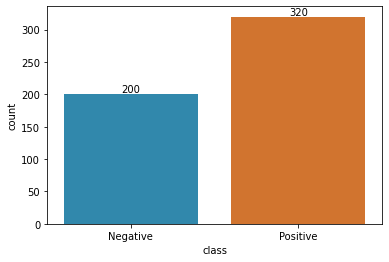

In [15]:
ax = sns.countplot(data=diabetes_df_copy, x='class',
              palette=['#1d91c0', "#ec7014"])

for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:>

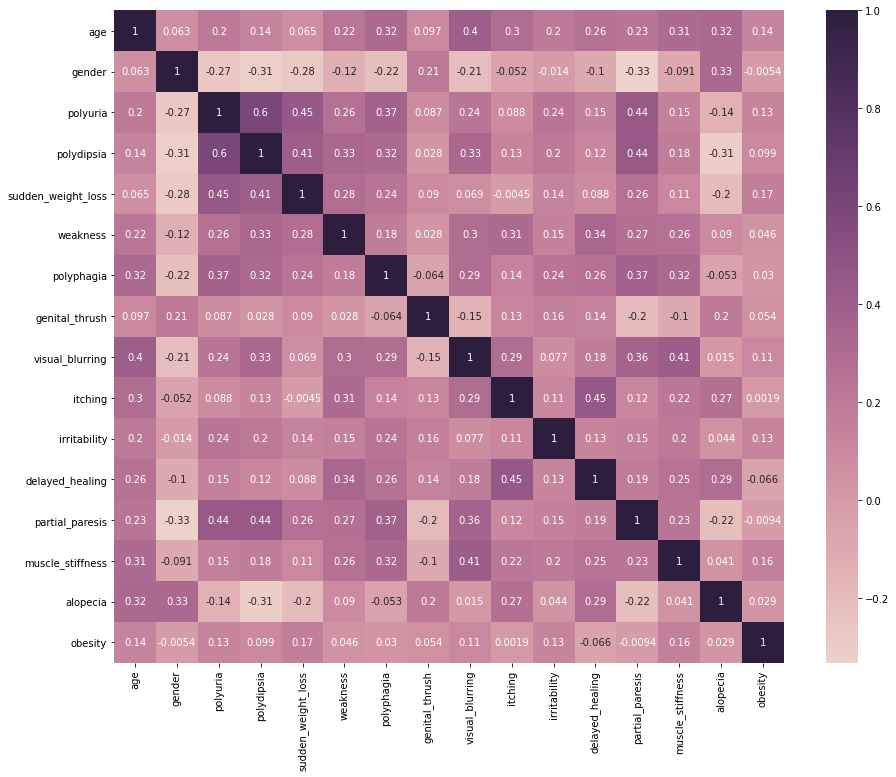

In [16]:
# check correlations between variables
corr_wine = diabetes_df_copy.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_wine, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

#### 5. Feature engineering

In [17]:
ft_cols = diabetes_df_copy.columns[diabetes_df_copy.columns.get_loc('age'): diabetes_df_copy.columns.get_loc('obesity')+1].tolist()

In [18]:
ft_cols

['age',
 'gender',
 'polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity']

In [19]:
# check mutual information (importance) of each feature
x = diabetes_df_copy.drop(['class'], axis=1)
y = diabetes_df_copy['class']
importance = mutual_info_classif(x, y, random_state=42)
df_importance = pd.DataFrame({'features': ft_cols, 'importance': importance.round(2)})
df_importance

,features,importance
0,age,0.11
1,gender,0.11
2,polyuria,0.25
3,polydipsia,0.26
4,sudden_weight_loss,0.08
5,weakness,0.00
6,polyphagia,0.06
7,genital_thrush,0.00
8,visual_blurring,0.02
9,itching,0.01


<AxesSubplot:xlabel='importance', ylabel='features'>

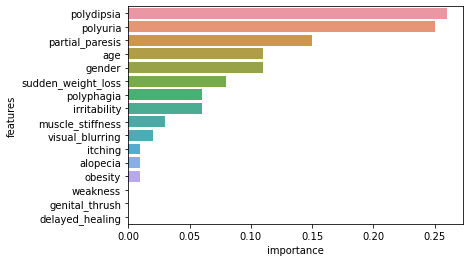

In [20]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

In [21]:
# Perform ANOVA test on each feature
f_values, p_values = f_classif(x, y)

# Create a dictionary of feature names and ANOVA scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = f_values[i],p_values[i]

# Sort the features by ANOVA score (in descending order)
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their ANOVA scores
d = []
for feature, score in sorted_scores:
    d.append({'Feature': feature, 'F': score[0], 'p': score[1]})

df_anova = pd.DataFrame(d)

# add significance column
signif = []

for p in df_anova['p']:
    if p <= 0.05:
        signif.append('significant')
    else:
        signif.append('not significant')

df_anova['signif'] = signif
df_anova

,Feature,F,p,signif
0,polyuria,412.738410,6.384838e-68,significant
1,polydipsia,376.422649,1.964187e-63,significant
2,gender,130.968787,3.422093e-27,significant
3,sudden_weight_loss,121.973731,1.307517e-25,significant
4,partial_paresis,119.046534,4.328222e-25,significant
5,polyphagia,68.841759,9.295946e-16,significant
6,irritability,51.030999,3.099695e-12,significant
7,alopecia,39.926590,5.687734e-10,significant
8,visual_blurring,34.917760,6.238605e-09,significant
9,weakness,32.585064,1.922906e-08,significant


Looks like 'obesity', 'delayed_healing' and 'itching' do not affect the target variable. It is an inferencial test on the data available and do not mean the  Maybe the models could be explored considering or not theses variables.

#### 6. Model selection and evaluation

In [22]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=123)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
unique_elements, counts = np.unique(y, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Negative: 200
Positive: 320


In [24]:
unique_elements, counts = np.unique(y_train, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Negative: 162
Positive: 254


In [25]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Negative: 38
Positive: 66


In [26]:
lr_params = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2']
    }

svm_params = {
    'C': [0.1, 1, 10], 
    'gamma': [1, 0.1, 0.01], 
    'kernel': ['linear', 'rbf', 'sigmoid']
    }

rf_params = {'n_estimators': [10, 50, 100],
             'criterion': ['gini', 'entropy'],
             'max_depth': [30, 60, 90, 120],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [15, 20, 25]}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
    }

In [44]:
def classify(X_train, X_test, y_train, y_test):

    # Logistic Regression Classifier
    lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=0), param_grid=lr_params, cv=10)
    lr.fit(X_train, y_train)
    lr_score = accuracy_score(y_test, lr.predict(X_test))
    print(f"Logistic Regression Accuracy: {lr_score}")

    # Support Vector Machine Classifier
    svm = GridSearchCV(SVC(class_weight='balanced', random_state=0), param_grid=svm_params, cv=10)
    svm.fit(X_train, y_train)
    svm_score = accuracy_score(y_test, svm.predict(X_test))
    print(f"SVM Accuracy: {svm_score}")
    
    # Random Forest Classifier
    rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0), param_grid=rf_params, cv=10)
    rf.fit(X_train, y_train)
    rf_score = accuracy_score(y_test, rf.predict(X_test))
    print(f"Random Forest Accuracy: {rf_score}")
    
    # Decision Tree Classifier
    dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=0), param_grid=dt_params, cv=10)
    dt.fit(X_train, y_train)
    dt_score = accuracy_score(y_test, dt.predict(X_test))
    print(f"Decision Tree Accuracy: {dt_score}")

    # Choose the best classifier
    classifiers = [('Logistic Regression', lr.best_estimator_, lr_score), 
                   ('SVM', svm.best_estimator_, svm_score), 
                   ('Random Forest', rf.best_estimator_, rf_score), 
                   ('Decision Tree', dt.best_estimator_, dt_score)]
    best_classifier = max(classifiers, key=lambda x: x[2])
    print(f"\nBest Classifier: {best_classifier[0]} with an accuracy of {best_classifier[2]}")
    print(f"\nBest Classifier Parameters: {best_classifier[1]}")

    return best_classifier[1] # Return the best classifier for further use

In [45]:
best_model = classify(X_train, X_test, y_train, y_test)

Logistic Regression Accuracy: 0.9326923076923077
SVM Accuracy: 0.9615384615384616
Random Forest Accuracy: 0.9230769230769231
Decision Tree Accuracy: 0.9711538461538461

Best Classifier: Decision Tree with an accuracy of 0.9711538461538461

Best Classifier Parameters: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)


In [46]:
pred = best_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96        38
    Positive       0.97      0.98      0.98        66

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [107]:
# save the model
joblib.dump(best_model, 'diabetes_DT_model.joblib')

['diabetes_DT_model.joblib']

In [ ]:
# save the scaler to insert in the app
scaler = StandardScaler()
scaler.fit_transform(X_train)

joblib.dump(scaler, 'scaler.joblib')

In [105]:
model = joblib.load('diabetes_DT_model.joblib')
scaler = joblib.load('scaler.joblib')

In [116]:
new_data = diabetes_df_copy.drop('class', axis = 1).iloc[[200]]
new_data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
200,40,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0


In [117]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[ 4.00000000e+01,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -1.28102657e-16, -7.68615940e-17,  1.00000000e+00,
         1.00000000e+00, -2.13504428e-17, -6.83214169e-17,
         1.00000000e+00,  1.00000000e+00,  1.70803542e-17,
         1.28102657e-16]])

In [118]:
prediction = model.predict(new_data_scaled)

In [119]:
prediction[0]

'Negative'